In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import json
import logging
import math
import os

from matplotlib import pyplot as plt
import pandas as pd
import papermage
from papermage.recipes import CoreRecipe
from papermage.visualizers import plot_entities_on_page
from tqdm.auto import tqdm

from papermage_components.materials_recipe import MaterialsRecipe

In [3]:
logging.basicConfig(level=logging.INFO)

In [4]:
recipe = MaterialsRecipe()

INFO:MaterialsRecipe:Instantiating recipe...
INFO:MaterialsRecipe:Finished instantiating recipe


In [15]:
sample_paper_filename = os.listdir('data/AM_Creep_Papers/')[6]
print(sample_paper_filename)
sample_paper = recipe.from_pdf(f"data/AM_Creep_Papers/{sample_paper_filename}")

INFO:MaterialsRecipe:Parsing document...


Effects of build direction and heat treatment on creep properties of Ni-base superalloy built up by additive manufacturing.pdf


INFO:MaterialsRecipe:Rasterizing document...
INFO:MaterialsRecipe:Predicting words...


In [ ]:
# print("\n\n".join([paper.titles[0].text.replace("\n", " ") for paper in paper_list]))

In [16]:
def highlight_relevant_entities(document):
    page_images = []
    for page in document.pages:
        highlighted = page.images[0]
        # highlighted = plot_entities_on_page(highlighted, page.tokens, box_width=0, box_alpha=0.3, box_color="yellow")
        highlighted = plot_entities_on_page(highlighted, page.annotation_highlights, box_width=2, box_alpha=0.1, box_color="orange")
        # highlighted = plot_entities_on_page(highlighted, page.captions, box_width=2, box_alpha=0.1, box_color="orange")
        #
        # highlighted = plot_entities_on_page(highlighted, page.tables, box_width=2, box_alpha=0.1, box_color="yellow")
        # highlighted = plot_entities_on_page(highlighted, page.figures, box_width=2, box_alpha=0.1, box_color="yellow")
        #
        # highlighted = plot_entities_on_page(highlighted, page.sections, box_width=2, box_alpha=0.1, box_color="green")
        # highlighted = plot_entities_on_page(highlighted, page.titles, box_width=2, box_alpha=0.1, box_color="green")
        #
        # highlighted = plot_entities_on_page(highlighted, page.blocks, box_width=2, box_alpha=0.1, box_color="grey")

        page_images.append(highlighted)
    return page_images

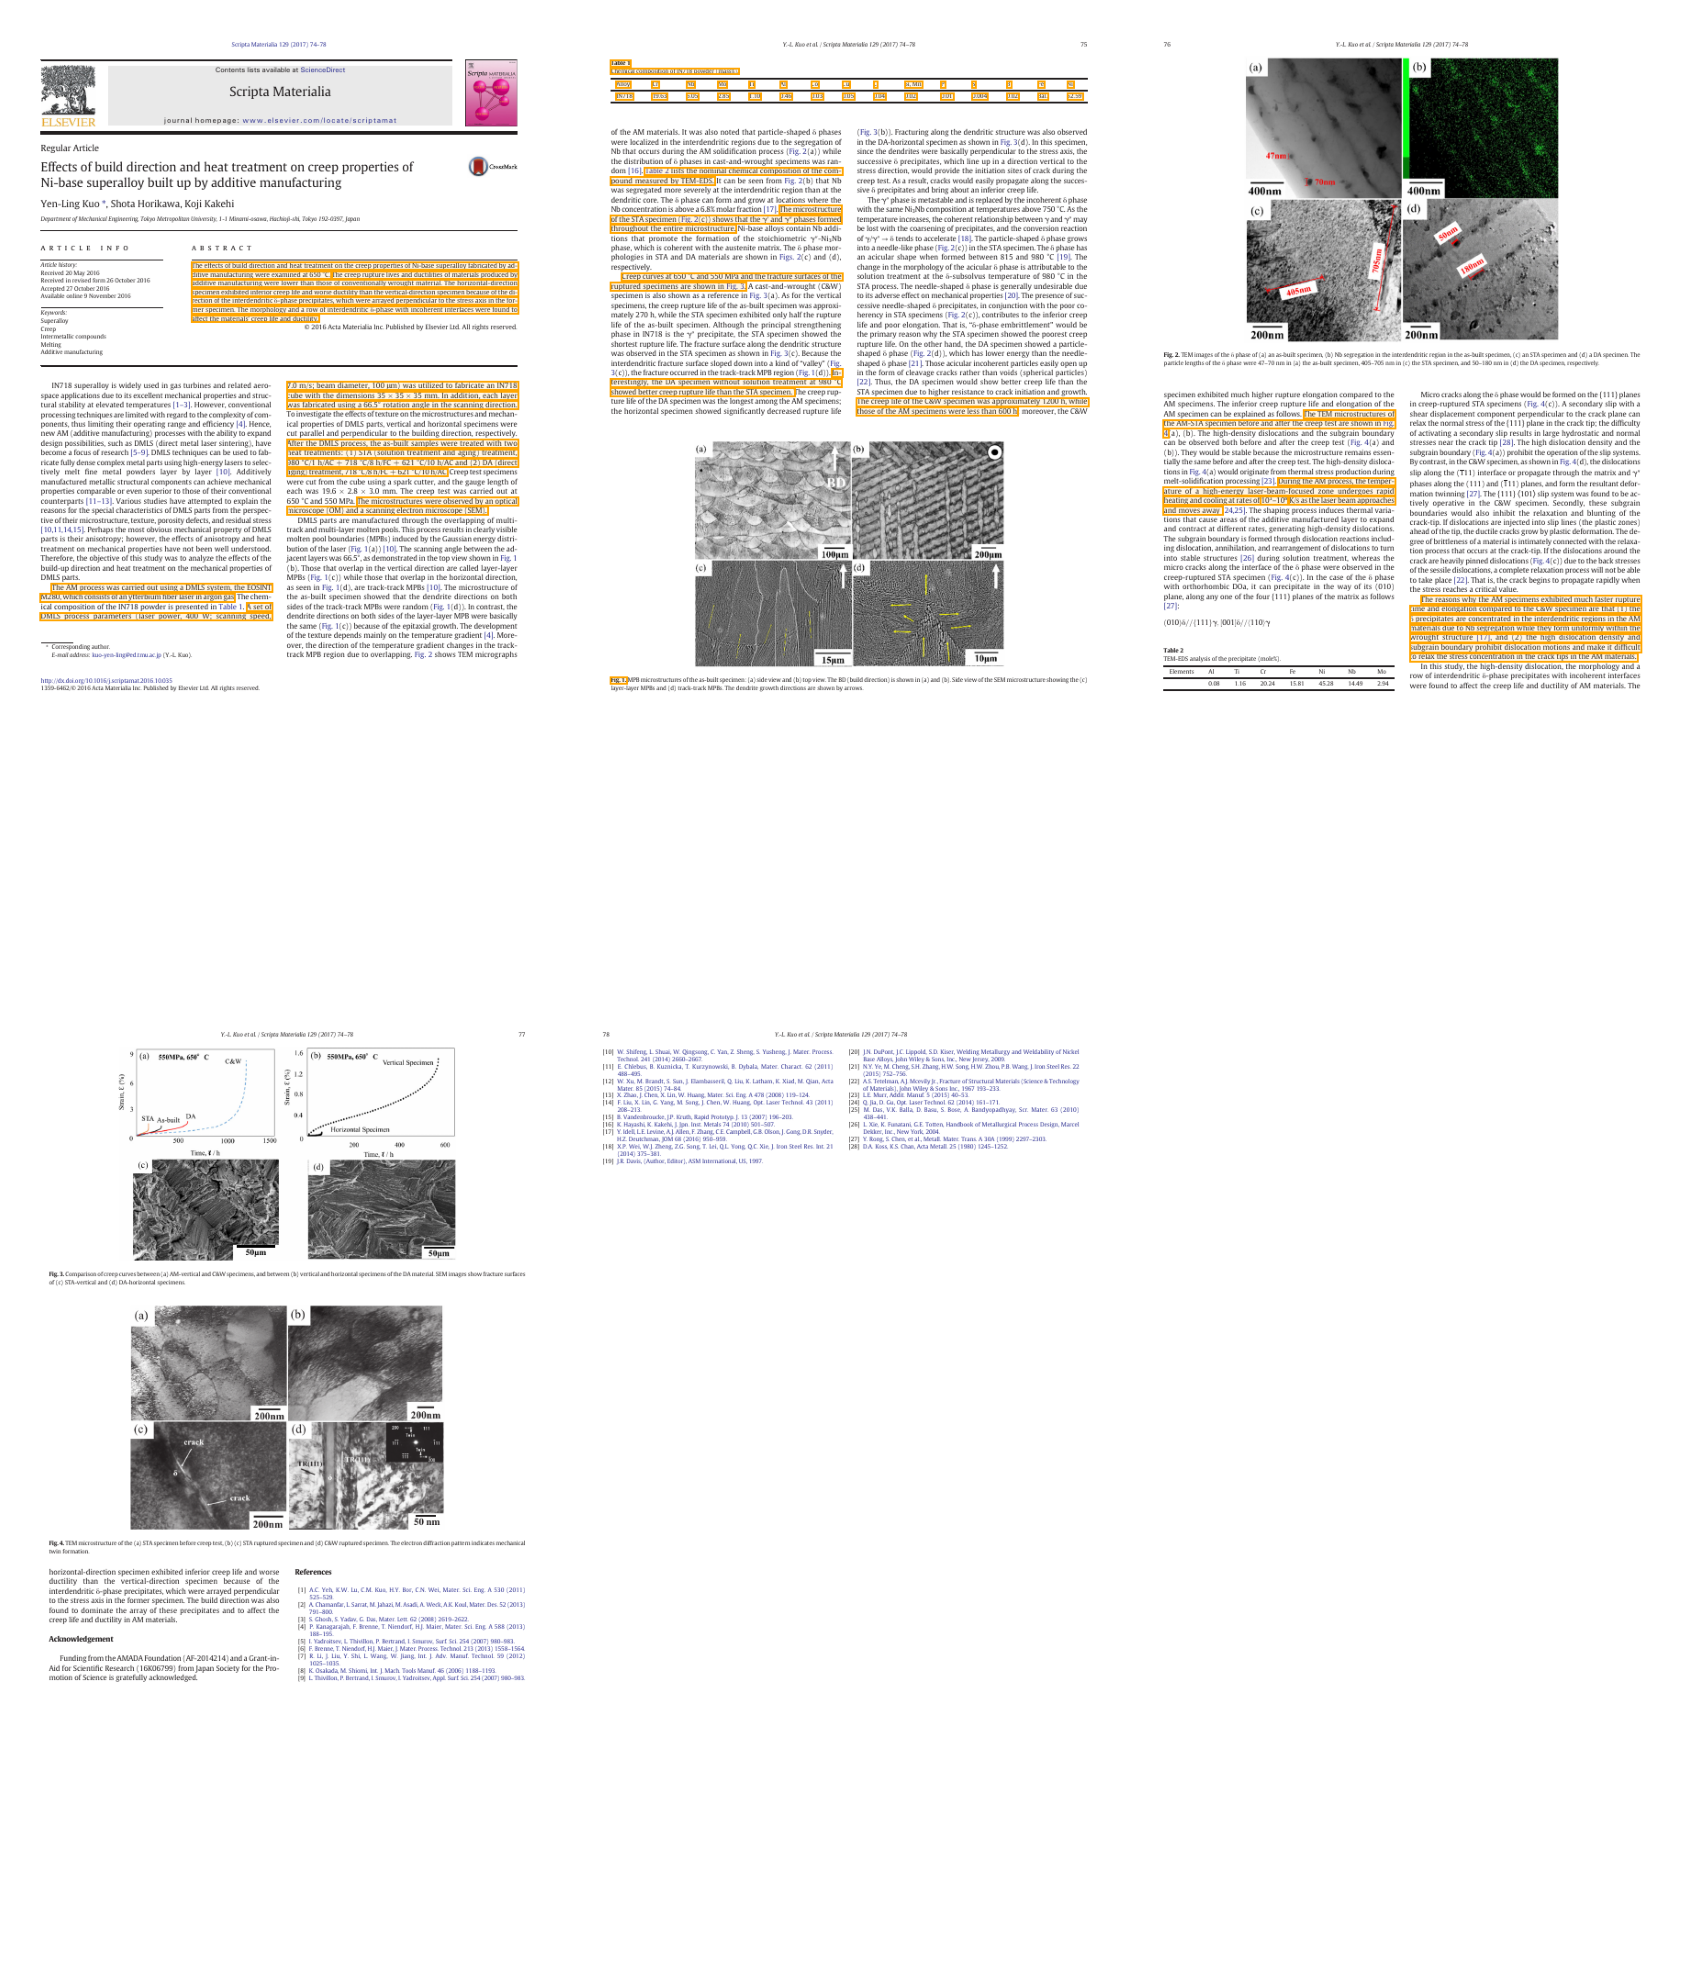

In [17]:
highlighted_doc = highlight_relevant_entities(sample_paper)

n_cols = 3
n_rows = math.ceil(len(highlighted_doc)/3)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(17,22), tight_layout=True)

for ax in itertools.chain(*axes):
        ax.set_axis_off()

for ax, image in zip(itertools.chain(*axes), highlighted_doc):
    ax.imshow(image.to_array())


In [ ]:
for sentence in sample_paper.sentences:
    print(sentence.text.replace("\n", " "))
    print("\n")

In [ ]:
for paper in paper_list:
    paper_title = ""
    for title in paper.titles:
        if len(title.text) > len(paper_title):
            paper_title = title.text
    paper_sentences = [sentence.text.replace("\n", " ") for sentence in paper.sentences]
    paper_abstract = paper.abstracts[0].text
    section_text = {}

    with open(f"data/AM_Creep_Papers_parsed/{paper_title.replace(' ', '_')}.json", "w") as f:
        json.dump({
            "title": paper_title, 
            "abstract": paper_abstract,
            "sentences": paper_sentences,
            "section_text": section_text,
        }, f, indent=4)
    

In [ ]:
type(paper_list[0])

In [ ]:
from papermage import Document

## NOTES:

- Titles are _sometimes_ (but rarely) flaky
- Figures are borked; we're really not getting much utility.
- Captions are a little better than figures, but there's a weird level of caption agglomeration going on. Not great, but still probably workable for tables.
- Tables seem, to be working fine!!
- a section is occasionally missed